This file calculates the mass ratio between the host galaxy and the mms galaxy.

In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import FunctionLib
import math
#%matplotlib widget
basePath ='./sims.TNG/TNG50-1/output'
from tqdm import tqdm
import gc
import os


In [2]:
Galaxy_Mass_Inf=50
Galaxy_Mass_Sup=500
Current_snapshot=99
Halos_fields=['GroupFirstSub','GroupNsubs','GroupMass']
Subhalos_fields=['SubhaloGrNr','SubhaloMass']


In [4]:
Halos_data=il.groupcat.loadHalos(basePath,Current_snapshot,fields=Halos_fields)


In [5]:
Subhalos_data=il.groupcat.loadSubhalos(basePath,Current_snapshot,fields=Subhalos_fields)


In [5]:
Subhalos_data


{'count': 5688113,
 'SubhaloGrNr': array([       0,        0,        0, ..., 10246964, 10246983, 10247006], dtype=int32),
 'SubhaloMass': array([  1.32896035e+04,   1.69459015e+02,   1.57060089e+02, ...,
          9.83576640e-04,   9.83576640e-04,   7.99156027e-04], dtype=float32)}

In [6]:
First_subhalo_id=Halos_data['GroupFirstSub']
N_subhalos=Halos_data['GroupNsubs']
Group_mass=Halos_data['GroupMass']


In [7]:
Condition=(Group_mass >=50) & (Group_mass <= 500)
MW_like_index=np.where(Condition)[0]


In [8]:
MW_like_index


array([ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 21

In [25]:
MW_like_index.shape


(285,)

In [15]:
Subhalos_grnr=Subhalos_data['SubhaloGrNr']
Subhalos_mass=Subhalos_data['SubhaloMass']


In [16]:
Ratio_array=np.array([])
for i in tqdm(MW_like_index):
    Firstsubid=First_subhalo_id[i]
    if Firstsubid == -1:continue
    if N_subhalos[i] == 1:continue
    Mass_array=np.array([])
    for j in range(N_subhalos[i]):
        Subhalo_id=Firstsubid+j
        Mass_array=np.append(Mass_array,Subhalos_mass[Subhalo_id])
    Mass_Host=Mass_array[np.argsort(Mass_array)[-1]]
    Mass_MMS=Mass_array[np.argsort(Mass_array)[-2]]
    Ratio_array=np.append(Ratio_array,Mass_MMS/Mass_Host)


100%|██████████| 285/285 [00:01<00:00, 185.74it/s]


In [23]:
np.where(Ratio_array == 0.02421657)[0]


array([], dtype=int64)

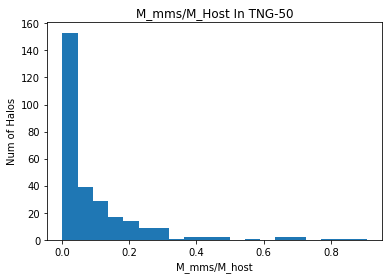

In [30]:
plt.hist(Ratio_array,bins=20)
plt.xlabel('M_mms/M_host')
plt.ylabel('Num of Halos')
plt.title('M_mms/M_Host In TNG-50')
plt.savefig('TNG_50.png')


In [ ]:
"285 in Tng 50"
"2661 in Tng 100"


In [16]:
plt.annotate


<function matplotlib.pyplot.annotate(*args, **kwargs)>

In [11]:
gas=il.snapshot.loadSubhalo(basePath,99,36,'gas',fields=['Coordinates','Masses'])


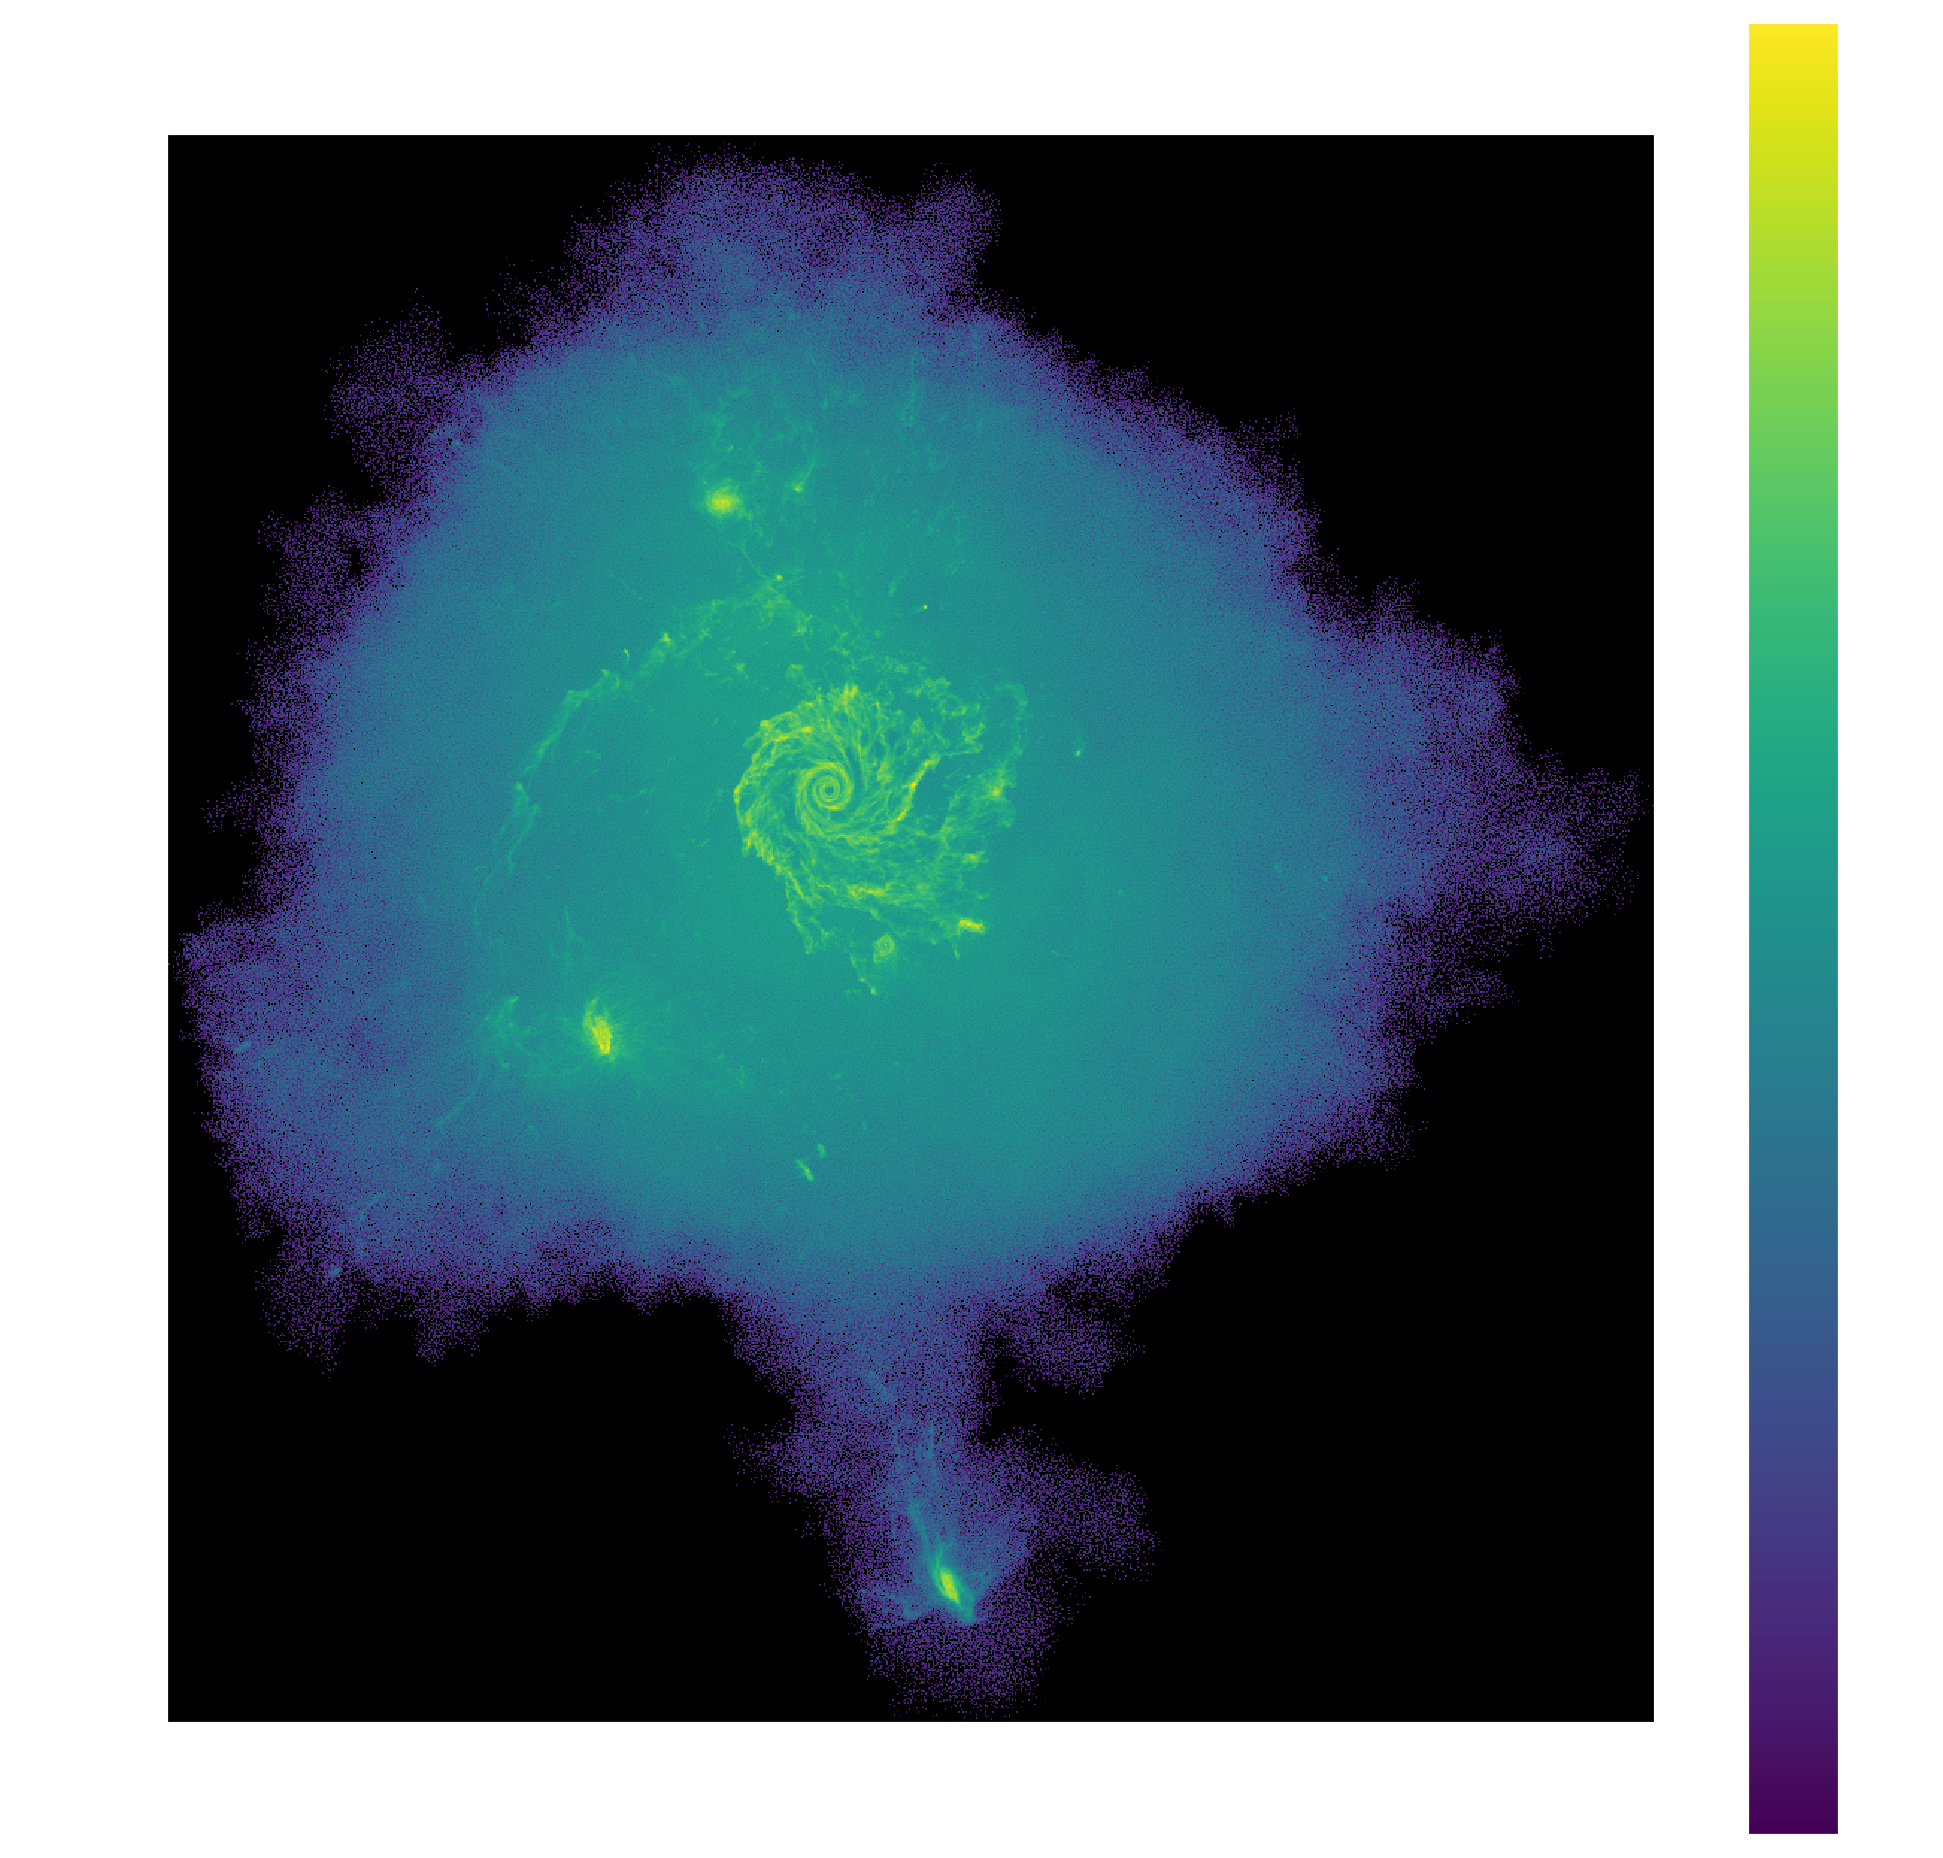

In [2]:
gas_data=il.snapshot.loadHalo(basePath, 99, 23, 'gas', fields=['Coordinates','Masses'])

GasCoordinates = gas_data['Coordinates']
Masses = gas_data['Masses']

GasCoorMin = GasCoordinates.min(axis=0)
GasCoorMax = GasCoordinates.max(axis=0)
plt.figure(figsize=(12, 12), dpi=200)

plt.style.use("dark_background")
bars=(GasCoorMax-GasCoorMin)
h, _, _, image = plt.hist2d(GasCoordinates[:, 1],
                            GasCoordinates[:, 2],
                            weights=Masses,

                            norm=mpl.colors.LogNorm(),
                            bins=(bars[1],bars[2]))
plt.xlim([GasCoorMin[1],GasCoorMax[1]])
plt.ylim([GasCoorMin[2],GasCoorMax[2]])
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
    #draw_circle = plt.Circle(( CircleCenter[1],  CircleCenter[2]), 150, fill=False)
    #plt.gcf().gca().add_artist(draw_circle)
plt.colorbar(image)
plt.gca().set_aspect(1)
plt.savefig('{}.png'.format(99))
